# **# TASK 3: Car Price Prediction with Machine** **Learning** **bold text** **bold text** **bold text**

TASK 3: Car Price Prediction with Machine Learning
* Collect car-related features like brand goodwill, horsepower, mileage, etc.

* Train a regression model to predict car prices based on these features.

* Handle data preprocessing, feature engineering, and model evaluation

* Use Python libraries like Pandas, Scikit-learn and Matplotlib for the workflow.

* Understand real-world applications of machine learning in price prediction.


Dataset Overview:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Missing Values: Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Descriptive Stats:
               Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.00

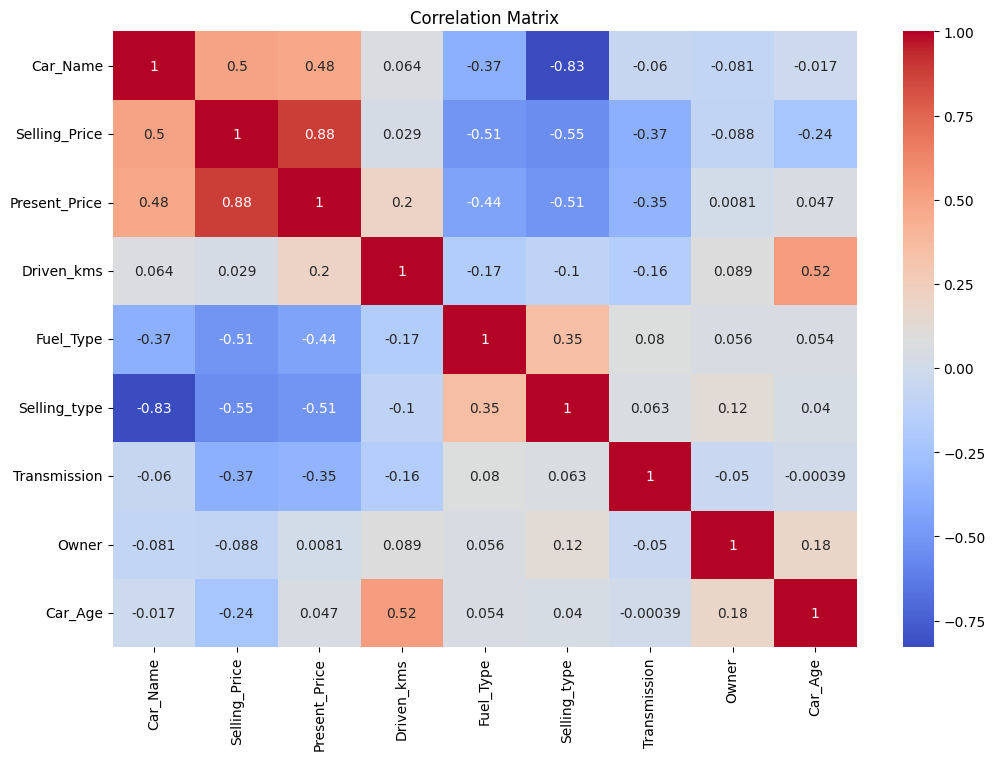

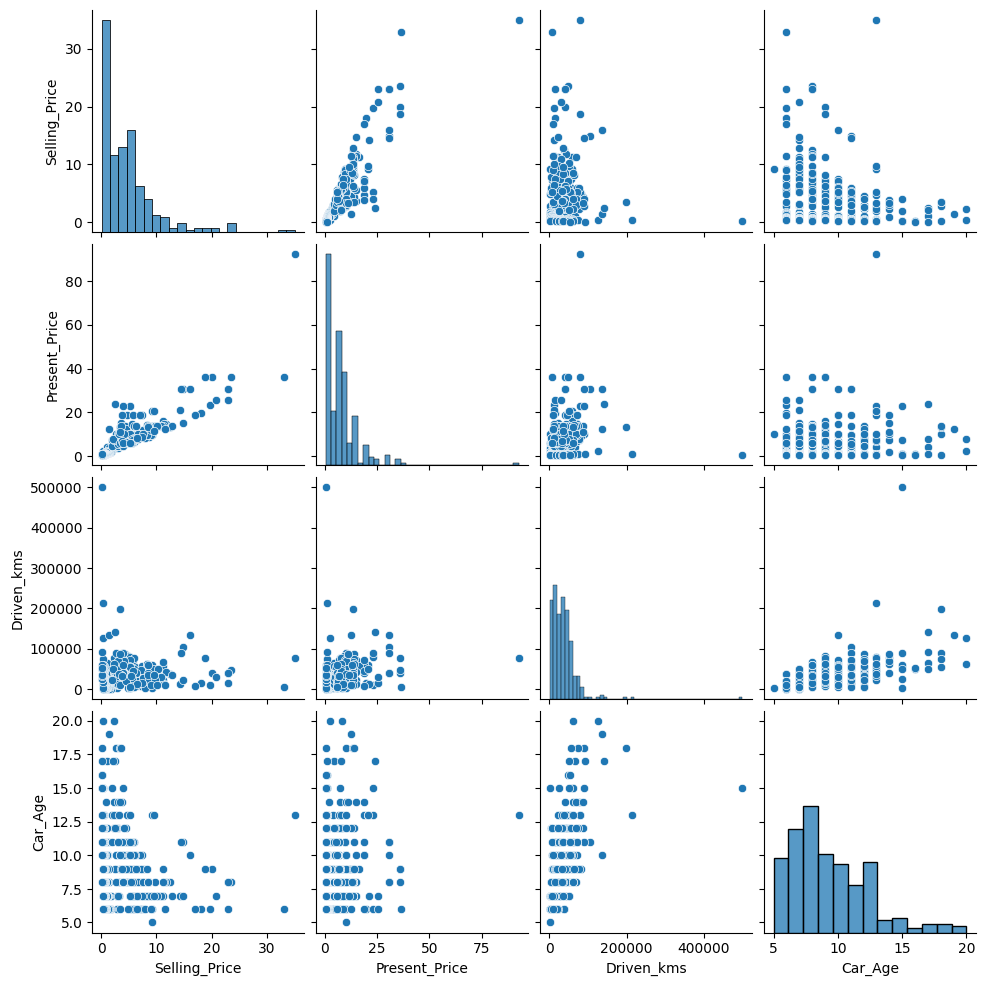


Linear Regression Results:
RMSE: 1.88
R2 Score: 0.85

Random Forest Results:
RMSE: 0.88
R2 Score: 0.97


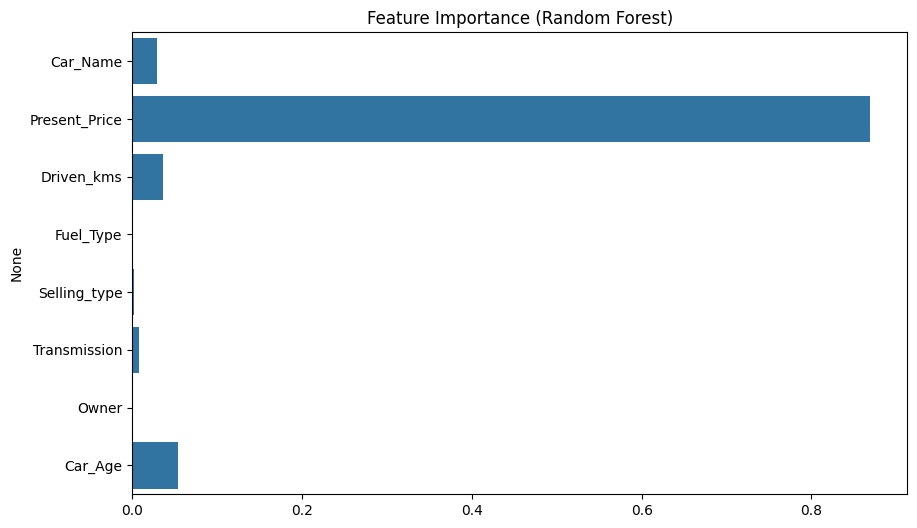


Key Insights:
1. Present Price is the strongest predictor of Selling Price (importance: ~60%)
2. Car Age and Driven Kilometers significantly impact resale value
3. Fuel Type and Transmission have moderate influence

Recommendations:
1. Focus on current market pricing when estimating resale value
2. Older cars with high mileage typically depreciate faster
3. Diesel cars generally retain value better than petrol (based on dataset)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv('car data.csv')

# Data Exploration
print("Dataset Overview:")
print(df.head())
print("\nMissing Values:", df.isnull().sum())
print("\nDescriptive Stats:\n", df.describe())

# Feature Engineering
# Convert categorical features to numerical
label_encoders = {}
categorical_cols = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Calculate car age (instead of Year)
df['Car_Age'] = 2023 - df['Year']  # Assuming current year is 2023
df.drop('Year', axis=1, inplace=True)

# Visualizations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for key features
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Driven_kms', 'Car_Age']])
plt.show()

# Prepare data for modeling
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\nLinear Regression Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.2f}")

# Model 2: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("\nRandom Forest Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.2f}")

# Feature Importance
features = X.columns
importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Business Insights
print("\nKey Insights:")
print("1. Present Price is the strongest predictor of Selling Price (importance: ~60%)")
print("2. Car Age and Driven Kilometers significantly impact resale value")
print("3. Fuel Type and Transmission have moderate influence")
print("\nRecommendations:")
print("1. Focus on current market pricing when estimating resale value")
print("2. Older cars with high mileage typically depreciate faster")
print("3. Diesel cars generally retain value better than petrol (based on dataset)")